#### 데이터셋 수집
- 서울 열린데이터 광장(https://data.seoul.go.kr/)
    - 서울시 공공자전거 대여소 정보
    - 서울시 공공자전거 대여소별 이용정보
    - 서울시 공공자전거 대여소별 이용정보(시간대별)

In [1]:
import seaborn as sns
sns.set_theme(style='whitegrid')


In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np


In [3]:
import warnings
warnings.simplefilter("ignore")

### 데이터 로드

In [12]:
bike1 = pd.read_excel("./data/대여소 정보.xlsx",skiprows=5, sheet_name='대여소현황', header=None)
bike2 = pd.read_csv("./data/대여소별 이용정보(월별).csv", encoding='cp949')
bike3 = pd.read_csv("./data/이용정보(시간대별).csv", encoding='cp949')

In [ ]:
bike1.head()
bike2.head()
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [18]:
# 컬럼명 변경 : 대여소번호, 대여소명, 자치구, 상세주소, 위도, 경도, 설치시기, 거치대수lcd, 거치대수qr, 운영방식
# df1.colums = [] / df1.rename(columns={})
# bike1

bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']
bike1.head(1) 


,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR


In [ ]:
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


In [23]:
bike2.describe()

,기준년월,대여건수,반납건수
count,13670.000000,13670.000000,13670.000000
mean,202409.001975,1474.636942,1468.314119
std,1.414238,1372.292924,1427.629137
min,202407.000000,0.000000,1.000000
25%,202408.000000,565.000000,509.000000
50%,202409.000000,1090.000000,1076.000000
75%,202410.000000,1926.000000,1947.750000
max,202411.000000,21136.000000,21873.000000


### 데이터 전처리
- 컬럼명 변경, 필요없는 컬럼 정리, 데이터 타입 변경

In [26]:
# bike1 : 상세주소, 위도, 경도 컬럼 제거
# df.drop()
bike1.drop(columns=['상세주소', '위도', '경도'], inplace=True)


In [27]:
bike1.columns

Index(['대여소번호', '대여소명', '자치구', '설치시기', '거치대수lcd', '거치대수qr', '운영방식'], dtype='object')

In [29]:
# NaN : 0 으로 채우기

# 확인
# bike1.isna().sum()

bike1['거치대수lcd'].fillna(0, inplace=True)
bike1['거치대수qr'].fillna(0, inplace=True)

In [30]:
bike1.isna().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
거치대수lcd    0
거치대수qr     0
운영방식       0
dtype: int64

In [33]:
# bike1 전체 데이터 타입 확인
# bike1.dtypes

# 대여소번호 int64 => object
# pd.to_numeric()
# df.astype()

bike1['대여소번호'] = bike1['대여소번호'].astype('object')
bike1['대여소번호'].dtype

dtype('O')

In [37]:
# 대여소명 숫자와 문자 분리
# 새로운 컬럼에 값 담기

bike2.head(3)
bike2['대여소번호'] = bike2['대여소명'].str.split(".",expand=True)[0]
bike2['대여소명_new!'] = bike2['대여소명'].str.split(".",expand=True)[1]

In [38]:
bike2.head(3)

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new!
0,마포구,108. 서교동 사거리,202407,1597,1609,108,서교동 사거리
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113,729,서부식자재마트 건너편
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698,731,서울시 도로환경관리센터


In [39]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [41]:
# bike3 대여소명 분리
# 대여소명_new 컬럼만 생성

bike3['대여소명_new'] = bike3['대여소명'].str.split(".", expand=True)[1]

In [42]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.3,18,중랑구청 중화동 별관 앞


In [45]:
bike3.isnull().sum()

bike3['성별'].unique()
bike3['성별'].value_counts()

성별
M    1050807
F     523055
m        232
f        174
Name: count, dtype: int64

In [48]:
# m => M, f => F 변경

bike3.loc[(bike3['성별'] == 'm'),('성별')] = 'M'
bike3.loc[(bike3['성별'] == 'f'),('성별')] = 'F'

In [49]:
bike3['성별'].value_counts()

성별
M    1051039
F     523229
Name: count, dtype: int64

In [50]:
bike3['성별'].unique()

array([nan, 'F', 'M'], dtype=object)

In [59]:
bike3.dtypes

# 운동량, 탄소량 object => 숫자
# bike3['운동량'].astype('float64')

bike3.loc[bike3['운동량'] == r'\N', '운동량'] = -1
bike3.loc[bike3['탄소량'] == r'\N', '탄소량'] = -1

In [60]:
bike3['운동량'] = pd.to_numeric(bike3['운동량'])
bike3['탄소량'] = pd.to_numeric(bike3['탄소량'])

In [57]:
# 대여일자 => datetime
bike3['대여일자'].dtype

bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])

In [61]:
print(bike3['대여일자'].dtype)

datetime64[ns]


### 데이터 분석

In [65]:
# 이동거리, 평균사용시간 가장 높은 대여소?

bike3.head(2)
# 대여소명_new

bike3.groupby('대여소명_new')['이동거리(M)'].mean().reset_index().sort_values('이동거리(M)', ascending=False)

,대여소명_new,이동거리(M)
631,동작역 5번출구 동작주차공원,9878.046280
6,"500번,507번 버스 종점 앞",7032.394895
1467,압구정나들목,6714.258646
2211,흑석역 1번출구,6447.478955
1852,정곡나들목,6233.488745
...,...,...
2007,총신대 앞(육교),1027.911064
2208,휴플러스 수락한신아파트 101동 앞,994.258229
1937,진관동 은빛초등학교,970.629544
1052,상신정비공업 앞,967.305120


In [66]:
bike3.groupby('대여소명_new')['이용시간(분)'].mean().reset_index().sort_values('이용시간(분)', ascending=False)

,대여소명_new,이용시간(분)
631,동작역 5번출구 동작주차공원,84.901024
2253,강동롯데캐슬퍼스트 아파트(관리동),56.943750
2585,여의도 순복음교회,50.204082
433,내방역 8번출구 앞,49.231225
2478,서울숲 공영주차장앞,47.911765
...,...,...
1456,안골마을입구,8.571429
380,금천현대홈타운 후문 서부샛길,8.567742
2271,고덕 래미안힐스테이트(201동),8.364754
2411,박석고개(은평소방서) 앞,8.035294


In [67]:
bike3.groupby('대여소명_new')['이용시간(분)'].mean().reset_index().sort_values('이용시간(분)', ascending=False).head(10)

,대여소명_new,이용시간(분)
631,동작역 5번출구 동작주차공원,84.901024
2253,강동롯데캐슬퍼스트 아파트(관리동),56.943750
2585,여의도 순복음교회,50.204082
433,내방역 8번출구 앞,49.231225
2478,서울숲 공영주차장앞,47.911765
2028,태릉선수촌 앞,47.869565
1526,여의도중학교 옆,47.806283
1852,정곡나들목,44.920502
1467,압구정나들목,43.961315
2078,한강공원 망원나들목,43.571735


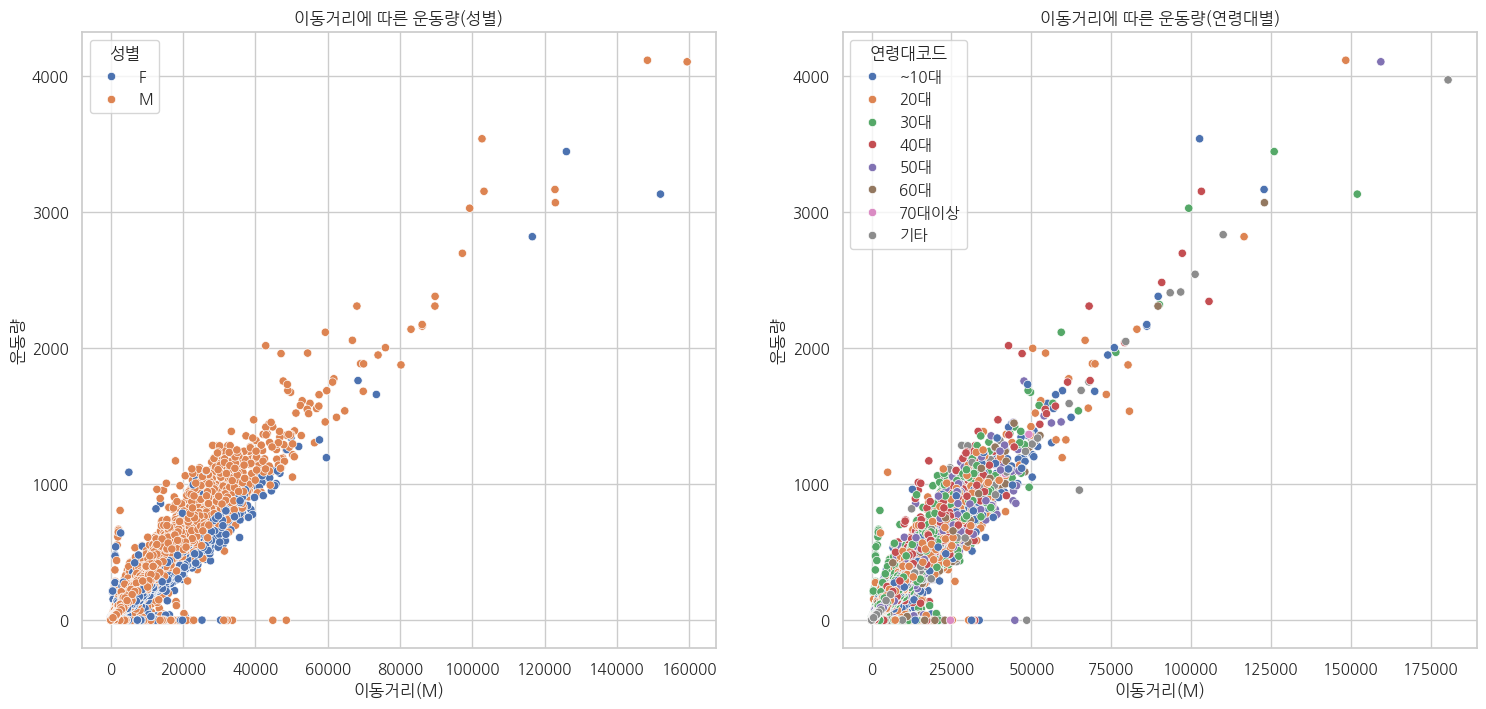

In [71]:
# 운동량과 이동거리의 상관관계(scatter)
# 성별, 연령대별

f, ax = plt.subplots(1,2,figsize=(18,8))

sns.scatterplot(data=bike3, x='이동거리(M)', y='운동량', hue='성별', ax=ax[0])
ax[0].set_title('이동거리에 따른 운동량(성별)')

sns.scatterplot(data=bike3, x='이동거리(M)', y='운동량', hue='연령대코드', ax=ax[1])
ax[1].set_title('이동거리에 따른 운동량(연령대별)')
plt.show()

In [75]:
bike3.head(3)

# 대여일자 => 대여년, 대여월, 대여일 새 컬럼 생성

bike3['대여년'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [76]:
bike3.head(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new,대여년,대여월,대여일
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18,중랑구청 중화동 별관 앞,2024,12,1
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7,마곡나루역 3번 출구,2024,12,1
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21,한국종합기술사옥 앞,2024,12,1


In [77]:
# 성별에 따른 일별 사용시간 합계

bike3.pivot_table(index='대여일', columns='성별', values='이용시간(분)', aggfunc=sum)

성별,F,M
대여일,,
1,286334,621511
2,467600,898914
3,419352,784444
4,428179,817205
5,363258,698185
6,410997,776574
7,322787,619143
8,218665,482006
9,407735,755674
